✅ Dataset cargado correctamente.
Forma: (52055, 8)

📋 Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52055 entries, 0 to 52054
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              52055 non-null  datetime64[ns]
 1   monto_recibido     52055 non-null  float64       
 2   precio             52055 non-null  float64       
 3   total              52055 non-null  float64       
 4   precio_compra      52055 non-null  float64       
 5   fecha_vencimiento  44071 non-null  datetime64[ns]
 6   nombre             52055 non-null  object        
 7   cantidad_total     52055 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(1)
memory usage: 3.2+ MB

🔍 Valores nulos:
fecha                   0
monto_recibido          0
precio                  0
total                   0
precio_compra           0
fecha_vencimiento    7984
nombre                

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
fecha,52055,NaN,NaN,NaN,2021-10-24 18:06:57.850350592,2019-01-02 00:00:00,2019-11-04 00:00:00,2021-08-06 00:00:00,2023-08-02 00:00:00,2025-12-08 00:00:00,NaN
monto_recibido,52055.0,NaN,NaN,NaN,430.332037,1.0,180.0,315.0,532.0,8080.0,395.171788
precio,52055.0,NaN,NaN,NaN,6.498515,0.2,2.0,4.0,8.0,29.0,6.578067
total,52055.0,NaN,NaN,NaN,12.115647,0.2,5.0,10.0,18.0,47.5,9.520194
precio_compra,52055.0,NaN,NaN,NaN,3.780732,0.01,1.1,2.35,4.79,30.0,4.119836
fecha_vencimiento,44071,NaN,NaN,NaN,2022-11-22 15:43:58.061310464,2002-01-01 00:00:00,2022-01-01 00:00:00,2022-01-05 00:00:00,2025-01-01 00:00:00,2205-01-01 00:00:00,NaN
nombre,52055,2230,DEXAMETASONA 8MG AMPOLLAS X 100,1466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cantidad_total,52055.0,NaN,NaN,NaN,2.971703,1.0,1.0,2.0,4.0,11.0,2.685466


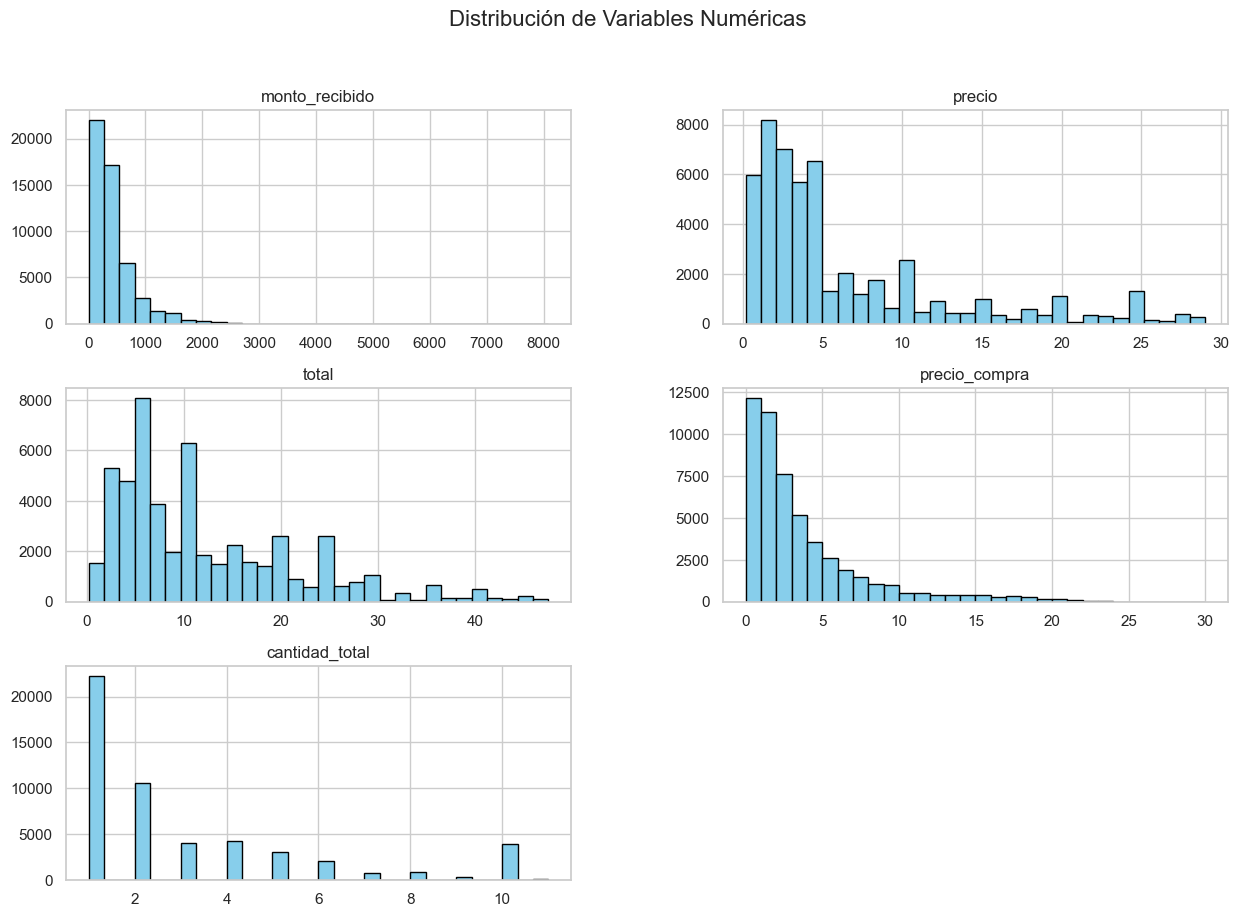

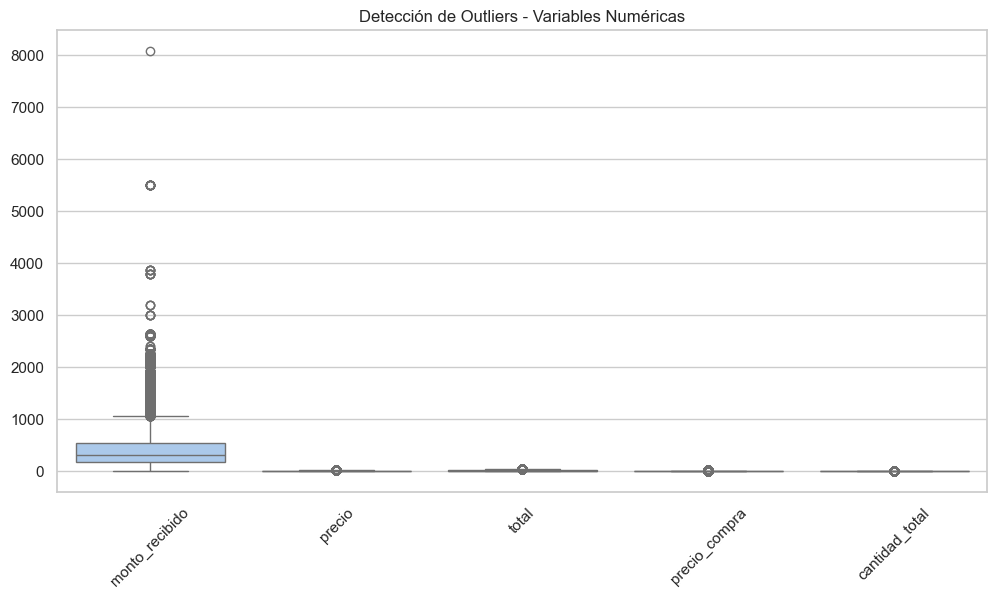

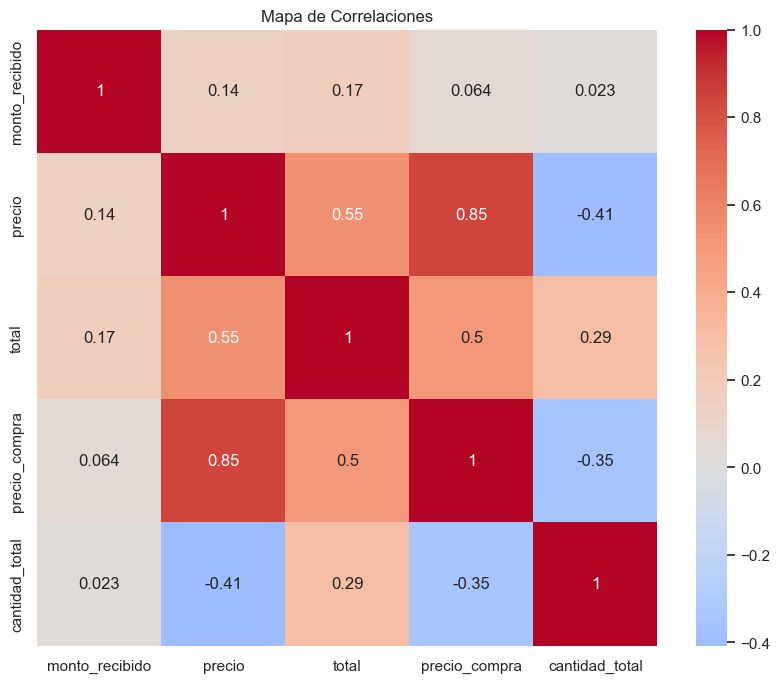

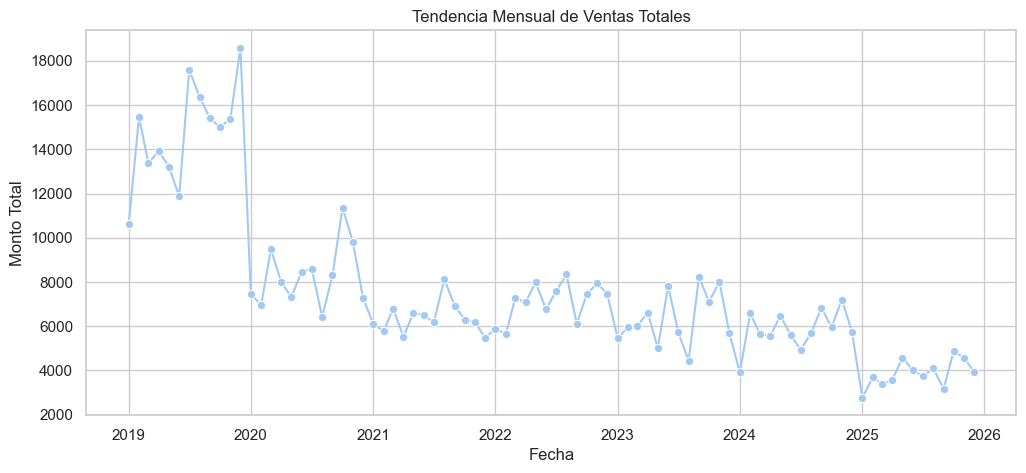

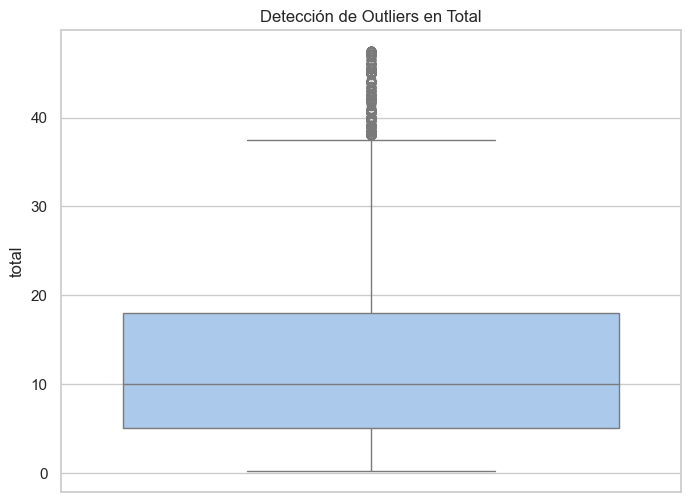


💡 Insights clave:
- Medicamentos más vendidos y más rentables detectados arriba.
- Tendencia mensual revela estacionalidad en ventas.
- Correlación entre precio_venta y ganancia_unitaria indica márgenes saludables.
- Revisar outliers en ganancia_total para detectar errores o excepciones.
- Este EDA sugiere variables candidatas para modelado predictivo: cantidad, precio_venta, ganancia_unitaria, mes, año.

✅ EDA completado con éxito.


In [6]:
# ===============================================================
# 🧠 Análisis Exploratorio de Datos (EDA)
# Dataset: dataset_farmacia_limpio.csv
# Autor: [Tu nombre o equipo]
# Fecha: Octubre 2025
# ===============================================================

# ========================================
# 1️⃣ Librerías necesarias
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Estilo visual
sns.set(style="whitegrid", palette="pastel")

# ========================================
# 2️⃣ Cargar el dataset
# ========================================
df = pd.read_csv("../output/dataset_farmacia_limpio.csv")

# Convertir fechas
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
if 'fecha_vencimiento' in df.columns:
    df['fecha_vencimiento'] = pd.to_datetime(df['fecha_vencimiento'], errors='coerce')

print("✅ Dataset cargado correctamente.")
print("Forma:", df.shape)
df.head(3)

# ========================================
# 3️⃣ Información general
# ========================================
print("\n📋 Información general:")
df.info()

print("\n🔍 Valores nulos:")
print(df.isnull().sum())

print("\n📈 Resumen estadístico:")
display(df.describe(include='all').T)

# ========================================
# 4️⃣ Análisis univariado
# ========================================
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Histograma general de variables numéricas
df[num_cols].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribución de Variables Numéricas', fontsize=16)
plt.show()

# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols])
plt.title('Detección de Outliers - Variables Numéricas')
plt.xticks(rotation=45)
plt.show()

# Top medicamentos (si existe la columna)
if 'medicamento_simple' in df.columns:
    top_med = df['medicamento_simple'].value_counts().head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_med.values, y=top_med.index, palette='viridis')
    plt.title('Top 15 Medicamentos más vendidos')
    plt.xlabel('Cantidad de registros')
    plt.ylabel('Medicamento')
    plt.show()

# ========================================
# 5️⃣ Análisis bivariado
# ========================================
# Correlación
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Correlaciones')
plt.show()

# Relación Precio vs Cantidad
if {'precio_venta','cantidad'}.issubset(df.columns):
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x='precio_venta', y='cantidad', alpha=0.5)
    plt.title('Relación entre Precio de Venta y Cantidad Vendida')
    plt.show()

# Precio vs Ganancia
if {'precio_venta','ganancia_unitaria'}.issubset(df.columns):
    sns.lmplot(data=df, x='precio_venta', y='ganancia_unitaria', scatter_kws={'alpha':0.3})
    plt.title('Precio de Venta vs Ganancia Unitaria')
    plt.show()

# ========================================
# 6️⃣ Análisis temporal
# ========================================
# Asegurar columnas temporales correctas
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month

# Eliminar filas con fechas inválidas
ventas_mes = (
    df.dropna(subset=['año','mes'])
      .groupby(['año','mes'])['total']
      .sum()
      .reset_index()
)

# Asegurar que mes y año sean enteros
ventas_mes['año'] = ventas_mes['año'].astype(int)
ventas_mes['mes'] = ventas_mes['mes'].astype(int)

# Crear fecha (primer día del mes)
ventas_mes['fecha'] = pd.to_datetime(
    ventas_mes['año'].astype(str) + '-' + ventas_mes['mes'].astype(str) + '-01',
    errors='coerce'
)

# 🔹 Gráfico temporal
plt.figure(figsize=(12,5))
sns.lineplot(data=ventas_mes, x='fecha', y='total', marker='o')
plt.title('Tendencia Mensual de Ventas Totales')
plt.xlabel('Fecha')
plt.ylabel('Monto Total')
plt.show()

# 🔹 Gráfico interactivo
fig = px.line(ventas_mes, x='fecha', y='total', title='📅 Tendencia Interactiva de Ventas Mensuales')
fig.update_traces(line_color='royalblue')
fig.show()

# ========================================
# 7️⃣ Rentabilidad y desempeño
# ========================================
if {'medicamento_simple','ganancia_total'}.issubset(df.columns):
    top_ganancia = df.groupby('medicamento_simple')['ganancia_total'].sum().sort_values(ascending=False).head(15)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_ganancia.values, y=top_ganancia.index, palette='magma')
    plt.title('Top 15 Medicamentos por Ganancia Total')
    plt.xlabel('Ganancia Total')
    plt.show()

if {'medicamento_simple','ingreso_total'}.issubset(df.columns):
    top_ingreso = df.groupby('medicamento_simple')['ingreso_total'].sum().sort_values(ascending=False).head(15)
    fig = px.bar(top_ingreso, x=top_ingreso.values, y=top_ingreso.index,
                 orientation='h', title='💰 Top Medicamentos por Ingreso Total',
                 labels={'x':'Ingreso Total','y':'Medicamento'})
    fig.show()

# ========================================
# 8️⃣ Outliers finales (opcional)
# ========================================
plt.figure(figsize=(8,6))
sns.boxplot(data=df, y='total')
plt.title('Detección de Outliers en Total')
plt.show()

# ========================================
# 9️⃣ Insights clave
# ========================================
print("\n💡 Insights clave:")
print("- Medicamentos más vendidos y más rentables detectados arriba.")
print("- Tendencia mensual revela estacionalidad en ventas.")
print("- Correlación entre precio_venta y ganancia_unitaria indica márgenes saludables.")
print("- Revisar outliers en ganancia_total para detectar errores o excepciones.")
print("- Este EDA sugiere variables candidatas para modelado predictivo: cantidad, precio_venta, ganancia_unitaria, mes, año.")

print("\n✅ EDA completado con éxito.")


In [1]:
pip install missingno


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


✅ Dataset cargado correctamente.
📏 Filas: 130583, Columnas: 13

🔹 Primeras filas:


,fecha,monto_recibido,precio,total,precio_compra,fecha_vencimiento,nombre,cantidad_total,nombre_limpio,categoria_diccionario,cluster,categoria_cluster,categoria_final
0,2019-07-01,470.0,9.5,9.5,8.13,2020-01-01,RESOTYL 200mg x 30comp,1.0,RESOTYL MG X COMP,Ansiolítico / Sedante,6,Analgésico / Antipirético,Ansiolítico / Sedante
1,2019-07-01,470.0,2.5,5.0,1.50,2020-01-01,BIOELECTRO 100 TABLETAS,2.0,BIOELECTRO TABLETAS,Rehidratante / Suplemento,3,Analgésico / Antipirético,Rehidratante / Suplemento
2,2019-07-01,470.0,2.5,5.0,1.75,2019-01-09,DYNAPAR SR 100,2.0,DYNAPAR SR,NaN,10,Analgésico / Antipirético,Analgésico / Antipirético
3,2019-07-01,470.0,4.5,4.5,3.70,2020-01-01,MIGRANOL COMPRIMIDOS x 100,1.0,MIGRANOL COMPRIMIDOS X,Analgésico / Antiinflamatorio,0,Analgésico / Antipirético,Analgésico / Antiinflamatorio
4,2019-07-01,470.0,6.0,42.0,4.03,2020-01-01,CLARITROMICINA 500 MG.,7.0,CLARITROMICINA MG,Antibiótico,11,Analgésico / Antipirético,Antibiótico



📋 Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130583 entries, 0 to 130582
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   fecha                  52093 non-null   object 
 1   monto_recibido         130583 non-null  float64
 2   precio                 130583 non-null  float64
 3   total                  130583 non-null  float64
 4   precio_compra          130583 non-null  float64
 5   fecha_vencimiento      110508 non-null  object 
 6   nombre                 130583 non-null  object 
 7   cantidad_total         130583 non-null  float64
 8   nombre_limpio          130583 non-null  object 
 9   categoria_diccionario  50660 non-null   object 
 10  cluster                130583 non-null  int64  
 11  categoria_cluster      130583 non-null  object 
 12  categoria_final        130583 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 13.0+ MB

📊 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
fecha,52093,751,2019-07-03,349,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monto_recibido,130583.0,NaN,NaN,NaN,428.735235,390.011714,1.0,180.0,313.0,530.0,8080.0
precio,130583.0,NaN,NaN,NaN,6.511521,6.583277,0.2,2.0,4.0,8.0,29.5
total,130583.0,NaN,NaN,NaN,12.16331,9.556893,0.2,5.0,10.0,18.0,47.5
precio_compra,130583.0,NaN,NaN,NaN,3.788634,4.131879,0.01,1.1,2.37,4.82,73.8
fecha_vencimiento,110508,171,2022-01-01,28821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nombre,130583,2541,DEXAMETASONA 8MG AMPOLLAS X 100,3771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cantidad_total,130583.0,NaN,NaN,NaN,2.975418,2.687723,1.0,1.0,2.0,4.0,11.0
nombre_limpio,130583,2355,DEXAMETASONA MG AMPOLLAS X,3771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categoria_diccionario,50660,42,Analgésico / Antiinflamatorio,11071,NaN,NaN,NaN,NaN,NaN,NaN,NaN



🔍 Conteo de valores nulos:


categoria_diccionario    79923
fecha                    78490
fecha_vencimiento        20075
monto_recibido               0
precio                       0
precio_compra                0
total                        0
cantidad_total               0
nombre                       0
nombre_limpio                0
cluster                      0
categoria_cluster            0
categoria_final              0
dtype: int64

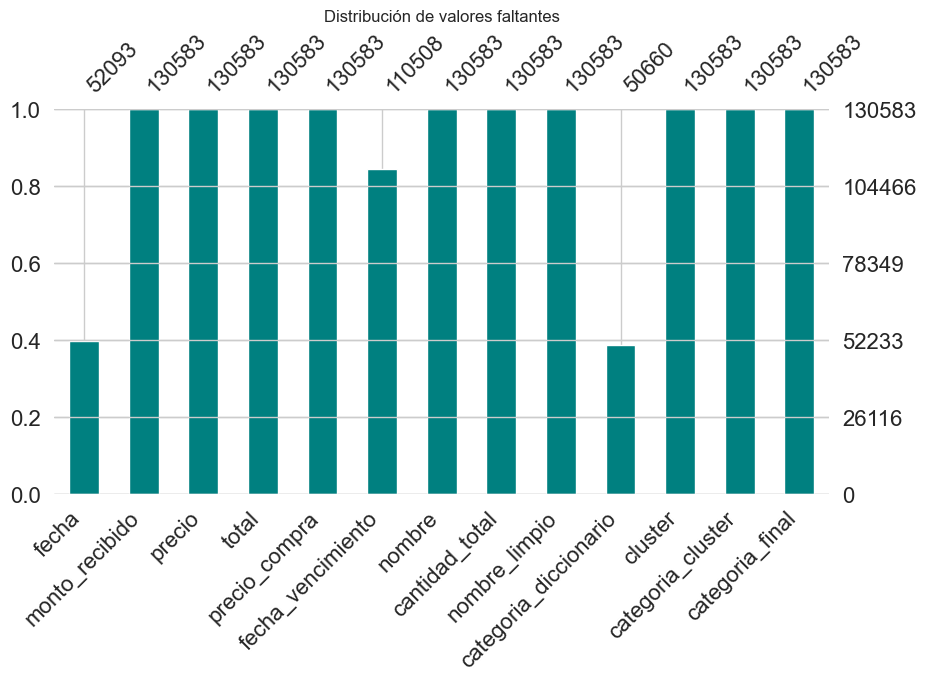


📦 Filas duplicadas: 4345

🔢 Variables numéricas (6): ['monto_recibido', 'precio', 'total', 'precio_compra', 'cantidad_total', 'cluster']
🔠 Variables categóricas (7): ['fecha', 'fecha_vencimiento', 'nombre', 'nombre_limpio', 'categoria_diccionario', 'categoria_cluster', 'categoria_final']


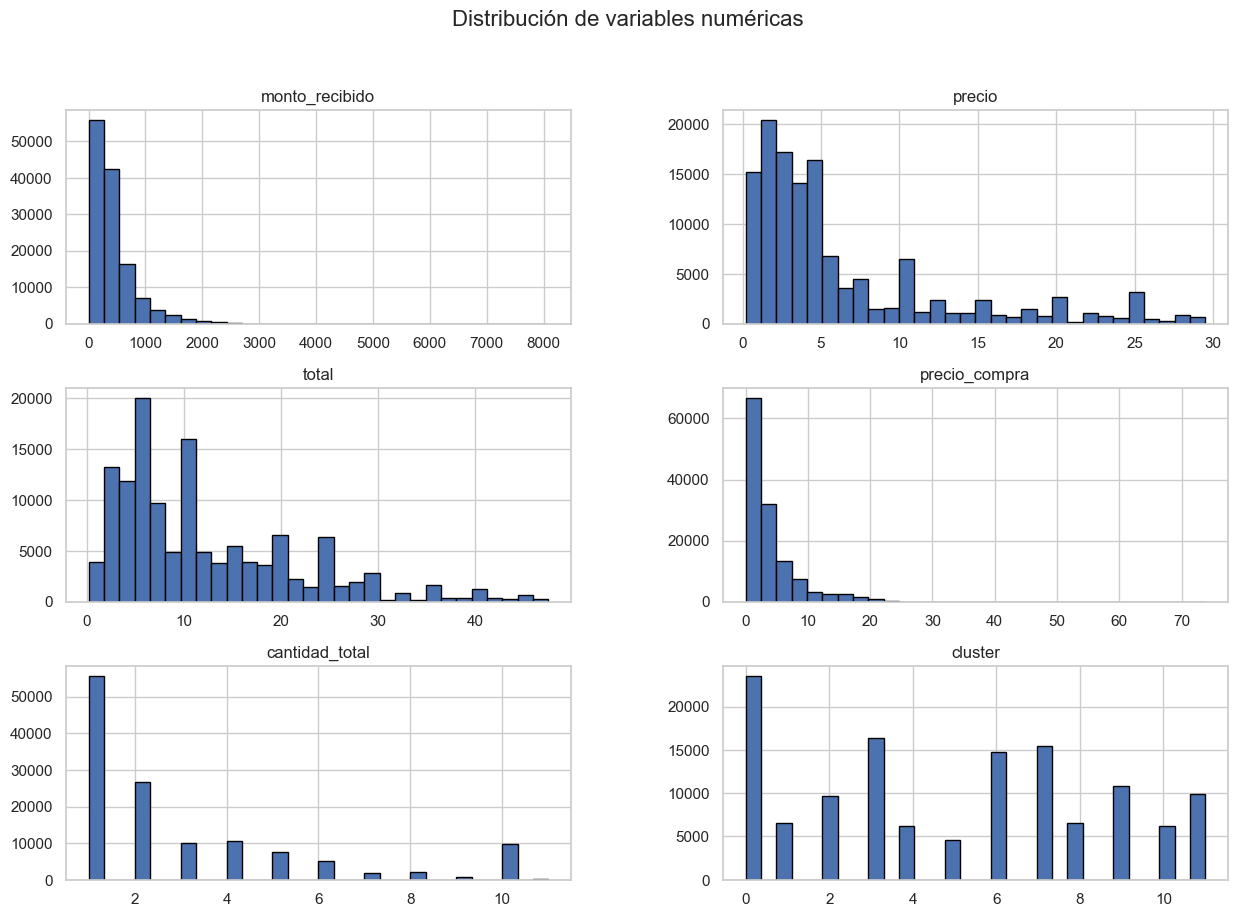

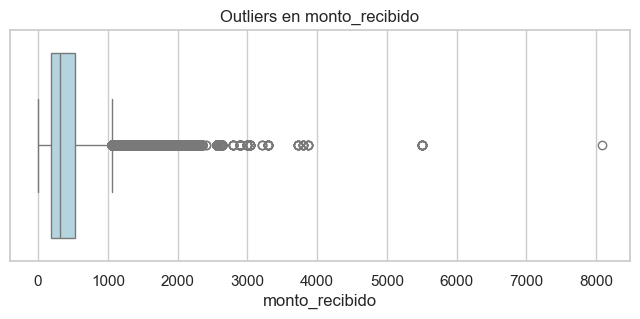

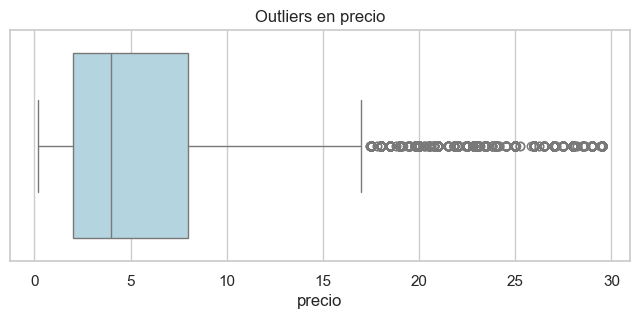

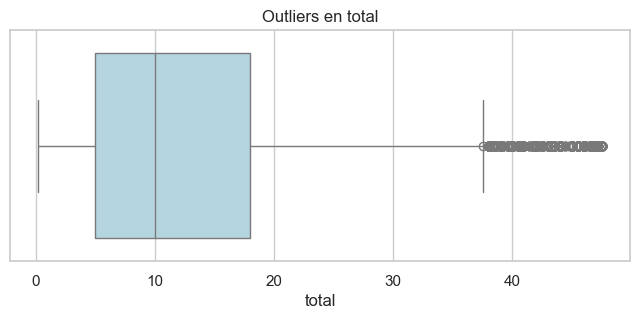

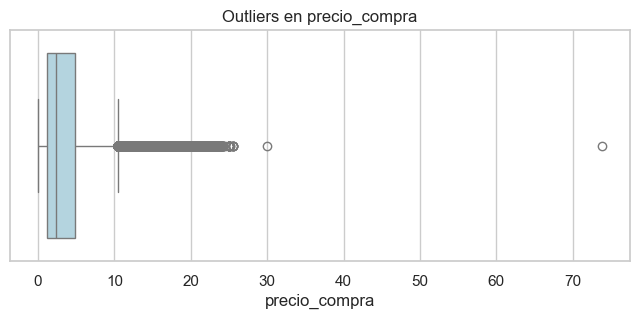

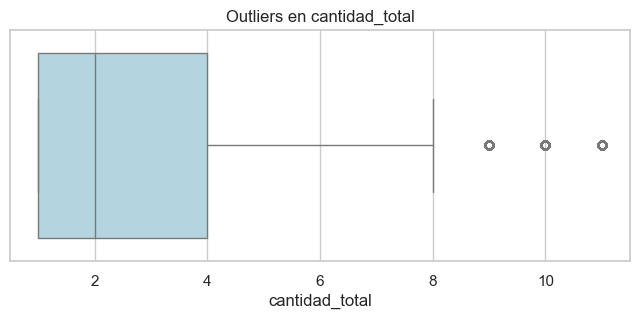

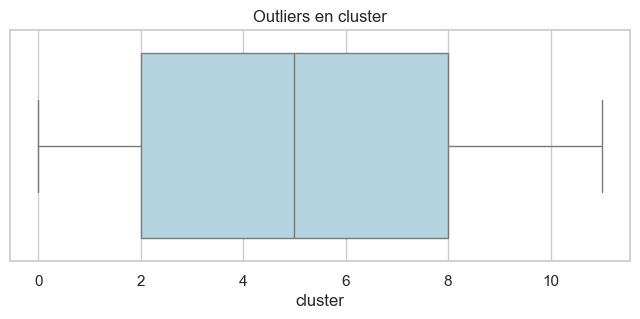

C:\Users\Jeimi\AppData\Local\Temp\ipykernel_20564\4288886920.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='crest')


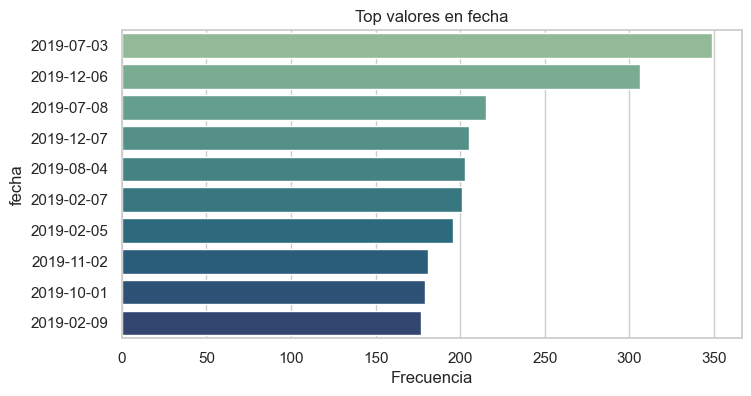

C:\Users\Jeimi\AppData\Local\Temp\ipykernel_20564\4288886920.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='crest')


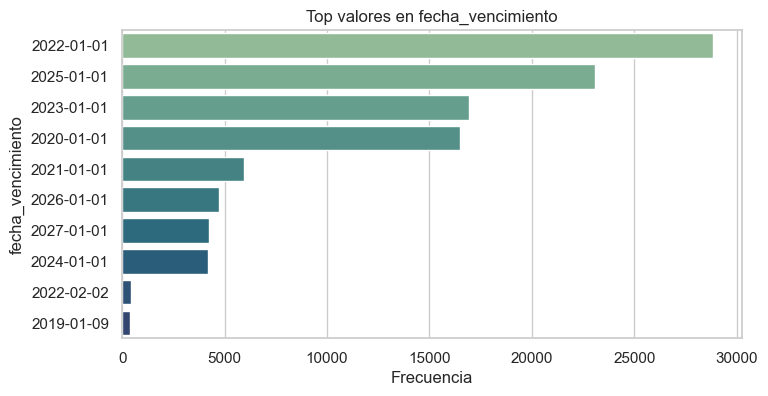

C:\Users\Jeimi\AppData\Local\Temp\ipykernel_20564\4288886920.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='crest')


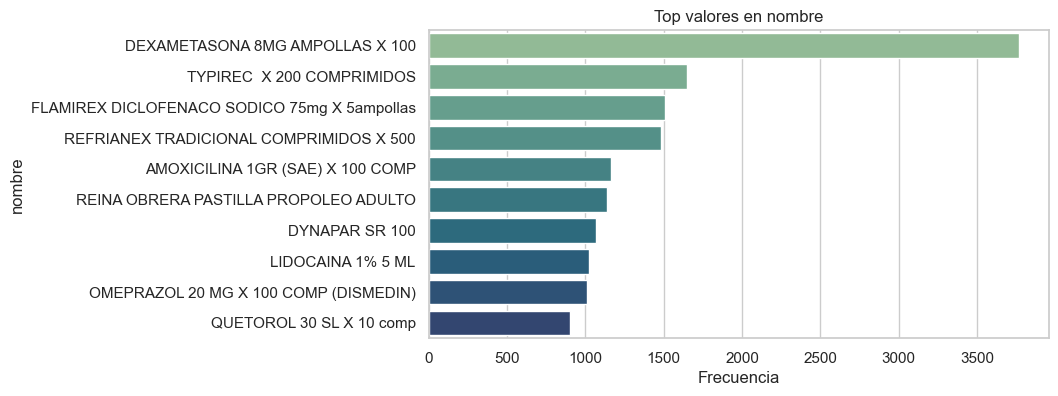

C:\Users\Jeimi\AppData\Local\Temp\ipykernel_20564\4288886920.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='crest')


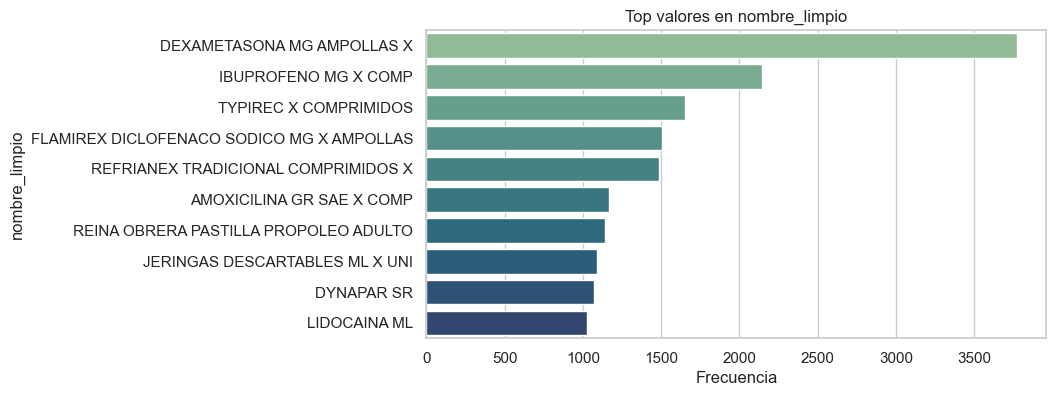

C:\Users\Jeimi\AppData\Local\Temp\ipykernel_20564\4288886920.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='crest')


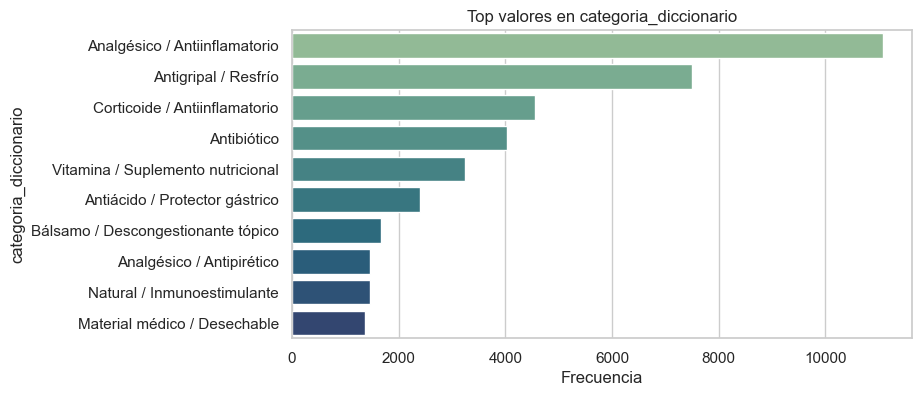

C:\Users\Jeimi\AppData\Local\Temp\ipykernel_20564\4288886920.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='crest')


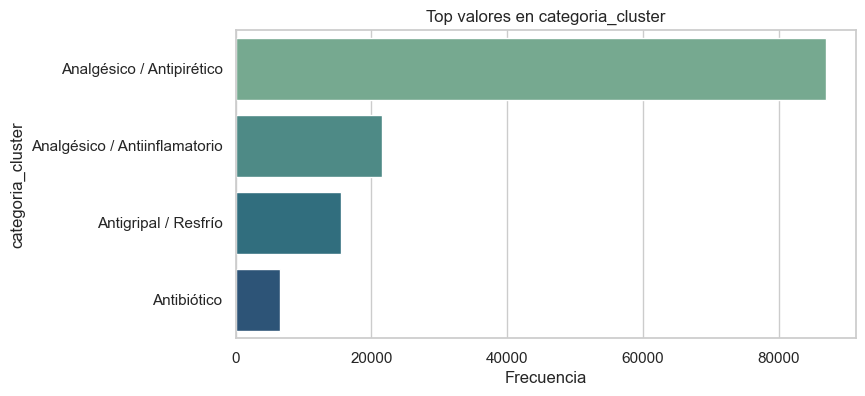

C:\Users\Jeimi\AppData\Local\Temp\ipykernel_20564\4288886920.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values.values, y=top_values.index, palette='crest')


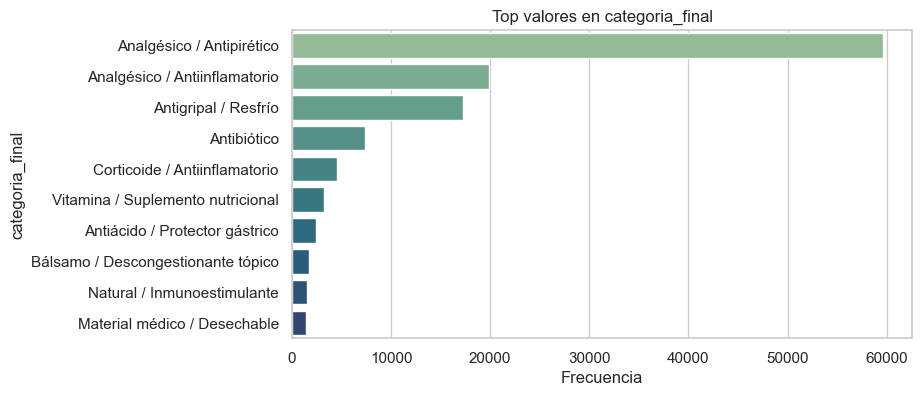

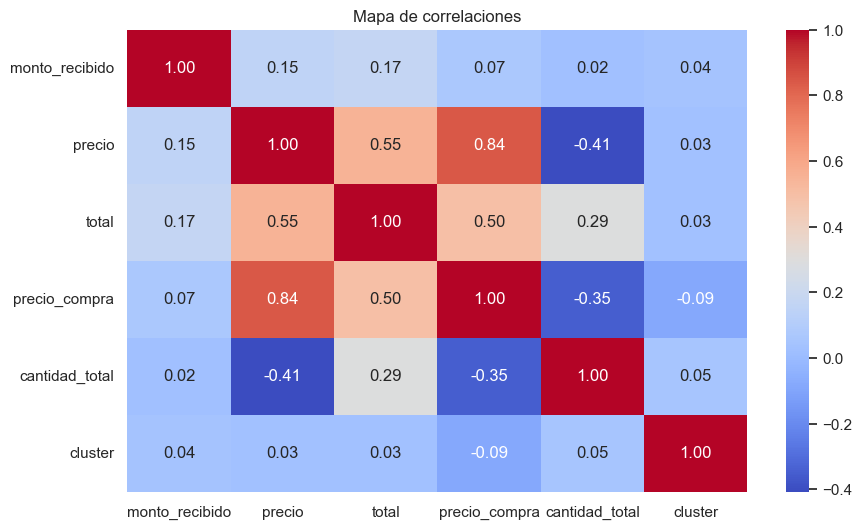

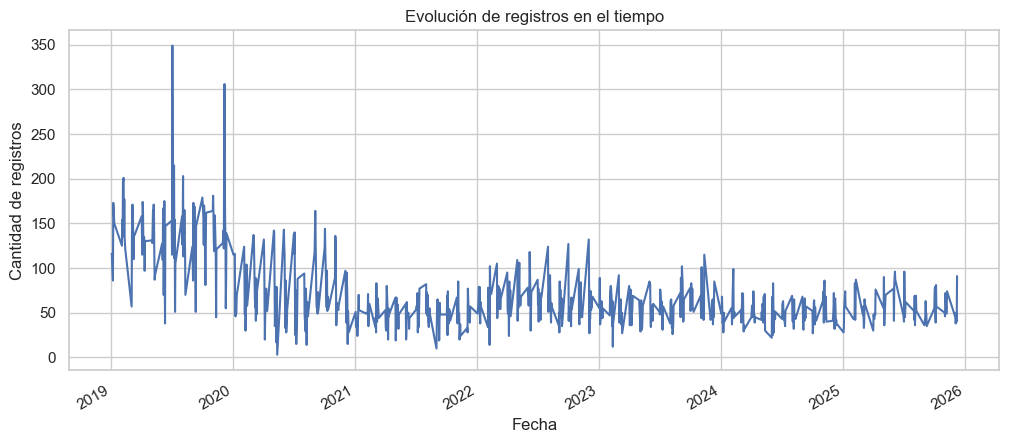

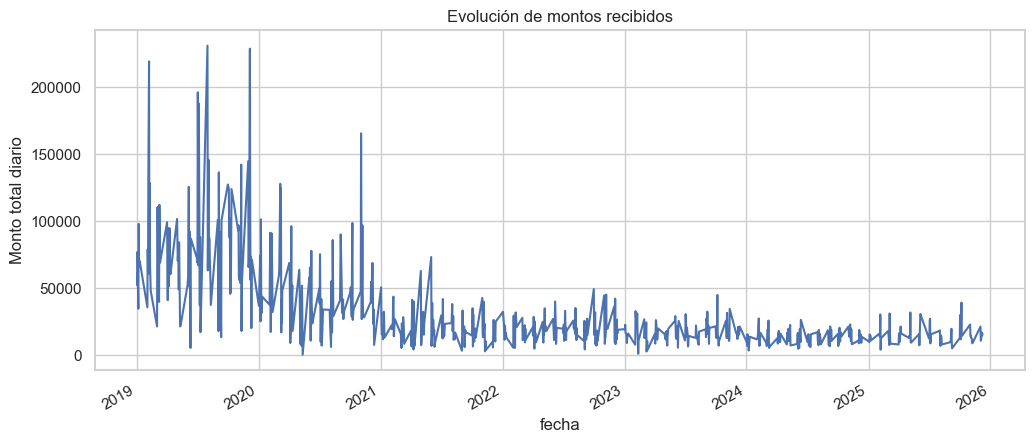


💡 Insights iniciales:
- Distribución de ventas por categoría
- Correlaciones detectadas entre variables numéricas.
- Revisión de outliers completada.
- Fechas procesadas (si existían).

✅ EDA detallado completado.


In [2]:
# ============================================
# 📊 EDA DETALLADO - Dataset Farmacia
# ============================================

# 🧰 Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Configuración visual
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# ============================================
# 1️⃣ Cargar dataset
# ============================================

df = pd.read_csv("../output/dataset_farmacia_categorizado.csv")

print("✅ Dataset cargado correctamente.")
print(f"📏 Filas: {df.shape[0]}, Columnas: {df.shape[1]}")
print("\n🔹 Primeras filas:")
display(df.head())

# ============================================
# 2️⃣ Información general
# ============================================

print("\n📋 Información del dataset:")
df.info()

print("\n📊 Descripción estadística:")
display(df.describe(include='all').T)

# ============================================
# 3️⃣ Valores faltantes
# ============================================

print("\n🔍 Conteo de valores nulos:")
display(df.isnull().sum().sort_values(ascending=False))

msno.bar(df, figsize=(10,5), color='teal')
plt.title("Distribución de valores faltantes")
plt.show()

# ============================================
# 4️⃣ Duplicados
# ============================================

duplicados = df.duplicated().sum()
print(f"\n📦 Filas duplicadas: {duplicados}")

# ============================================
# 5️⃣ Tipos de variables
# ============================================

numericas = df.select_dtypes(include=np.number).columns.tolist()
categoricas = df.select_dtypes(exclude=np.number).columns.tolist()

print(f"\n🔢 Variables numéricas ({len(numericas)}): {numericas}")
print(f"🔠 Variables categóricas ({len(categoricas)}): {categoricas}")

# ============================================
# 6️⃣ Análisis de variables numéricas
# ============================================

if len(numericas) > 0:
    df[numericas].hist(figsize=(15, 10), bins=30, edgecolor='black')
    plt.suptitle("Distribución de variables numéricas", fontsize=16)
    plt.show()

    # Boxplots para outliers
    for col in numericas:
        plt.figure(figsize=(8, 3))
        sns.boxplot(x=df[col], color='lightblue')
        plt.title(f"Outliers en {col}")
        plt.show()

# ============================================
# 7️⃣ Análisis de variables categóricas
# ============================================

for col in categoricas:
    plt.figure(figsize=(8, 4))
    top_values = df[col].value_counts().head(10)
    sns.barplot(x=top_values.values, y=top_values.index, palette='crest')
    plt.title(f"Top valores en {col}")
    plt.xlabel("Frecuencia")
    plt.ylabel(col)
    plt.show()

# ============================================
# 8️⃣ Correlaciones numéricas
# ============================================

if len(numericas) > 1:
    plt.figure(figsize=(10, 6))
    corr = df[numericas].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de correlaciones")
    plt.show()

# ============================================
# 9️⃣ Tendencias temporales (si hay fecha)
# ============================================

if 'fecha' in df.columns:
    df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
    df = df.sort_values('fecha')

    plt.figure(figsize=(12, 5))
    df.groupby('fecha').size().plot()
    plt.title("Evolución de registros en el tiempo")
    plt.xlabel("Fecha")
    plt.ylabel("Cantidad de registros")
    plt.show()

    if 'monto_recibido' in df.columns:
        plt.figure(figsize=(12, 5))
        df.groupby('fecha')['monto_recibido'].sum().plot()
        plt.title("Evolución de montos recibidos")
        plt.ylabel("Monto total diario")
        plt.show()

# ============================================
# 🔟 Insights iniciales
# ============================================

print("\n💡 Insights iniciales:")
print("- Distribución de ventas por categoría")
if 'categoria' in df.columns:
    display(df['categoria'].value_counts(normalize=True).head(10))

print("- Correlaciones detectadas entre variables numéricas.")
print("- Revisión de outliers completada.")
print("- Fechas procesadas (si existían).")

print("\n✅ EDA detallado completado.")
